In [1]:
import importlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import my_functions as mf
importlib.reload(mf)

<module 'my_functions' from '/Users/fergusayton/Documents/My Library/fayt3249/2024/Honours Thesis/sample_coupling_analysis/my_functions.py'>

In [2]:
def my_boltzmann_distribution(energy_g_freq, energy_e_freq, temperatures):
    """
    Calculate the Boltzmann probabilities for an array of temperatures.

    Parameters:
    - energy_g_freq: float, energy of the ground state (in Hz)
    - energy_e_freq: float, energy of the excited state (in Hz)
    - temperatures: numpy array or list of temperatures (in K)

    Returns:
    - prob_e_over_prob_g: numpy array of probabilities ratio (excited/ground)
    - prob_g: numpy array of ground state probabilities
    - prob_e: numpy array of excited state probabilities
    """
    k_B_freq = 2.083661912 * 10**10  # [Hz/K]
    
    # Convert temperatures to a numpy array in case it's a list
    temperatures = np.array(temperatures)

    # Calculate Boltzmann factors
    boltzman_factor_g = np.exp(-energy_g_freq / (k_B_freq * temperatures))
    boltzman_factor_e = np.exp(-energy_e_freq / (k_B_freq * temperatures))

    # Calculate partition function
    partition_func = boltzman_factor_g + boltzman_factor_e

    # Calculate probabilities
    prob_g = boltzman_factor_g / partition_func
    prob_e = boltzman_factor_e / partition_func

    # Calculate probability ratio
    prob_e_over_prob_g = boltzman_factor_e / boltzman_factor_g

    return prob_e_over_prob_g, prob_g, prob_e

/var/folders/zj/k61bftd91r1cdpjh8_mkq7nm0000gn/T/ipykernel_8485/1471991662.py:21: RuntimeWarning: overflow encountered in exp
  boltzman_factor_g = np.exp(-energy_g_freq / (k_B_freq * temperatures))
/var/folders/zj/k61bftd91r1cdpjh8_mkq7nm0000gn/T/ipykernel_8485/1471991662.py:28: RuntimeWarning: invalid value encountered in divide
  prob_g = boltzman_factor_g / partition_func


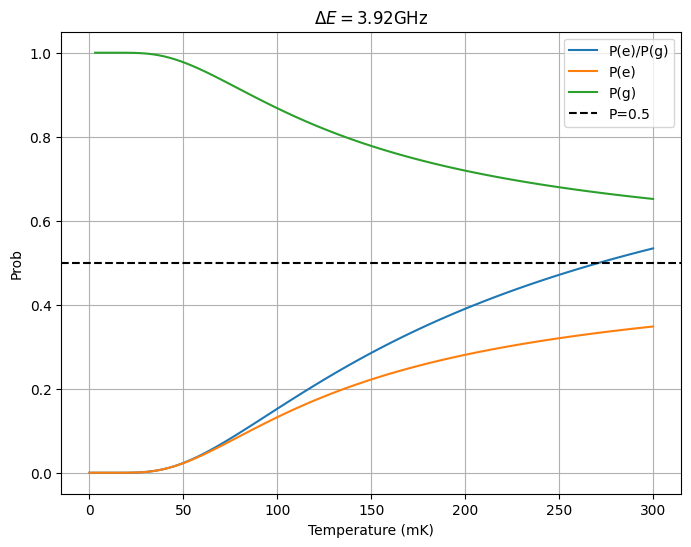

In [3]:
import numpy as np
import matplotlib.pyplot as plt

g_freq =-1.96 * 10**9
e_freq = 1.96 * 10**9
range = 0.3 #[K]
temp_vect = np.linspace(1* 10**-6, range, 100)
temp_vect = np.array(temp_vect)


probs_e_g, probs_g, probs_e = my_boltzmann_distribution(energy_g_freq=g_freq, energy_e_freq=e_freq, temperatures=temp_vect)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(temp_vect*10**3, probs_e_g, label="P(e)/P(g)")
plt.plot(temp_vect*10**3, probs_e, label="P(e)")
plt.plot(temp_vect*10**3, probs_g, label="P(g)")
plt.axhline(0.5, linestyle="--", color = "k", label ="P=0.5")
# plt.axvline(50, linestyle="--", color = "b", label ="T = 50mk")
plt.xlabel("Temperature (mK)")
plt.ylabel("Prob")
plt.title(r"$\Delta E = ${}GHz".format(np.round(np.abs(g_freq-e_freq)*10**-9, 3)))
plt.grid()
plt.legend()
plt.show()


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import mplcursors
%matplotlib tk
# Define parameters
g_freq = -1.96 * 10**9
e_freq = 1.96 * 10**9
range_temp = 0.3  # [K]
temp_vect = np.linspace(1e-6, range_temp, 100)

# Compute probabilities
probs_e_g, probs_g, probs_e = my_boltzmann_distribution(energy_g_freq=g_freq, energy_e_freq=e_freq, temperatures=temp_vect)

# Create figure and plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(temp_vect * 1e3, probs_e_g, label="P(e)/P(g)")
ax.plot(temp_vect * 1e3, probs_e, label="P(e)")
ax.plot(temp_vect * 1e3, probs_g, label="P(g)")
ax.axhline(0.5, linestyle="--", color="k", label="P=0.5")

ax.set_xlabel("Temperature (mK)")
ax.set_ylabel("Probability")
ax.set_title(r"$\Delta E = ${} GHz".format(np.round(np.abs(g_freq - e_freq) * 1e-9, 3)))
ax.grid()
ax.legend()

# Enable hover interaction
cursor = mplcursors.cursor(ax.lines, hover=True)

@cursor.connect("add")
def on_hover(sel):
    sel.annotation.set_text(f"x: {sel.target[0]:.2f} mK\ny: {sel.target[1]:.4f}")

# Show the plot in a new window
plt.show()#)block=True)

/var/folders/zj/k61bftd91r1cdpjh8_mkq7nm0000gn/T/ipykernel_8485/1471991662.py:21: RuntimeWarning: overflow encountered in exp
  boltzman_factor_g = np.exp(-energy_g_freq / (k_B_freq * temperatures))
/var/folders/zj/k61bftd91r1cdpjh8_mkq7nm0000gn/T/ipykernel_8485/1471991662.py:28: RuntimeWarning: invalid value encountered in divide
  prob_g = boltzman_factor_g / partition_func
